# Detecting Attack/Intrusion in Plant using Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Let's predefine some libraries that will be used in the notebook. Although, they will be again called at various 
# positions but this cell is defined to provide information about used libraries.

from scipy import stats

from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

import datetime
from datetime import datetime
import matplotlib.dates as mpldates

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [3]:
#To set output to be shown in float format let's run below code
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
#Below code is to load the variable in which Normal Data is stored in NDA notebook
%store -r normal_data_sorted

In [4]:
#Below code is to load the variable in which Attack Data is stored in ADA notebook so that
#we don't need to Re-run below lines of code. 
%store -r data_sorted

### Below line of code is to load the attack data in pandas dataframe.

In [5]:
attack_data = pd.read_excel('./WADI_attackdata.xlsx')

### One-Class SVM trial on raw data

In [181]:
from sklearn.svm import OneClassSVM
#clf = OneClassSVM(gamma='auto').fit(data_sorted)
#The above code is taking huge time to execute.

In [58]:
# Now let's first try One class SVM on a smaller part of the dataset
clf = OneClassSVM(gamma='auto').fit(normal_data_sorted.iloc[0:10000,0:100])

In [60]:
prediction = clf.predict(data_sorted.iloc[0:1000,0:100])
prediction

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [29]:
data_sorted.head()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
0,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
1,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
2,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
3,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39
4,164.21,0.529486,11.9972,482.48,0.331167,0.001273,0,0,48.482,1,...,1,1,1,1,1,1,1,62.6226,1,0.39


### Isolation Forest trial on raw data

In [20]:
from sklearn.ensemble import IsolationForest

In [72]:
clf = IsolationForest(contamination=0,random_state=0, behaviour='new').fit(data_sorted.iloc[0:1000,0:50])

In [74]:
clf.predict(normal_data_sorted.iloc[0:1000,0:50])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
data_sorted.memory_usage()

Index                            80
1_AIT_001_PV                1382408
1_AIT_003_PV                1382408
1_AIT_004_PV                1382408
1_AIT_005_PV                1382408
1_FIT_001_PV                1382408
1_LS_001_AL                 1382408
1_LS_002_AL                 1382408
1_LT_001_PV                 1382408
1_MV_001_STATUS             1382408
1_MV_002_STATUS             1382408
1_MV_003_STATUS             1382408
1_MV_004_STATUS             1382408
1_P_001_STATUS              1382408
1_P_002_STATUS              1382408
1_P_003_STATUS              1382408
1_P_004_STATUS              1382408
1_P_005_STATUS              1382408
1_P_006_STATUS              1382408
2_DPIT_001_PV               1382408
2_FIC_101_CO                1382408
2_FIC_101_PV                1382408
2_FIC_101_SP                1382408
2_FIC_201_CO                1382408
2_FIC_201_PV                1382408
2_FIC_201_SP                1382408
2_FIC_301_CO                1382408
2_FIC_301_PV                

Ok, so now we had tried fitting two models on both our data but they are not showing satisfiable accuracy. Probably that is because of large dimension of data. So, let's try to reduce dimensions for better operability.

## Dimensionality Reduction

#### Low Variance Filter
Let's see if applying a filter on variance of features can help us in reducing dimensions. 

In [68]:
data_sorted.describe()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,...,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW
count,172801.000,172795.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,...,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000
mean,176.210,0.649,11.928,453.784,0.275,0.543,0.000,0.000,55.540,1.274,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,62.707,1.000,0.553
std,18.669,0.352,0.139,18.863,0.038,0.862,0.000,0.000,8.707,0.453,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.059,0.000,0.460
min,0.000,0.000,0.000,0.000,0.202,0.001,0.000,0.000,37.002,0.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,56.604,1.000,0.000
25%,170.866,0.589,11.911,440.867,0.241,0.001,0.000,0.000,47.830,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,60.227,1.000,0.220
50%,177.234,0.631,11.928,454.977,0.274,0.001,0.000,0.000,55.933,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,61.371,1.000,0.550
75%,179.533,0.661,11.952,468.240,0.306,1.872,0.000,0.000,62.489,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,63.096,1.000,0.710
max,634.492,6.000,12.110,484.871,0.351,2.495,0.000,0.000,75.216,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,141.175,1.000,2.330


In [41]:
normal_data_sorted.describe()

,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_005_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_FIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_001_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_002_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_001_STATUS,...,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\LEAK_DIFF_PRESSURE,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\PLANT_START_STOP_LOG,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\TOTAL_CONS_REQUIRED_FLOW
count,1048571.000,1048559.000,1048571.000,1048565.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,...,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000
mean,167.182,0.622,11.717,493.427,0.306,0.524,0.000,0.000,57.125,1.270,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,63.061,1.000,0.548
std,13.919,0.060,0.172,18.054,0.049,0.852,0.000,0.000,11.977,0.448,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.940,0.000,0.444
min,0.000,0.000,0.000,0.000,0.208,0.001,0.000,0.000,0.027,0.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,45.397,1.000,0.000
25%,155.981,0.583,11.598,483.170,0.261,0.001,0.000,0.000,48.828,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,60.530,1.000,0.220
50%,162.614,0.625,11.777,496.371,0.306,0.001,0.000,0.000,57.689,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,61.764,1.000,0.530
75%,174.473,0.661,11.817,505.307,0.345,1.853,0.000,0.000,63.212,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,63.619,1.000,0.710
max,214.311,2.059,12.013,526.529,0.422,2.077,0.000,0.000,100.217,2.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,147.295,1.000,2.260


(array([96.,  1.,  3.,  0.,  2.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  1.]),
 array([   0.        ,   12.56516271,   25.13032542,   37.69548813,
          50.26065084,   62.82581355,   75.39097625,   87.95613896,
         100.52130167,  113.08646438,  125.65162709,  138.2167898 ,
         150.78195251,  163.34711522,  175.91227793,  188.47744064,
         201.04260335,  213.60776606,  226.172

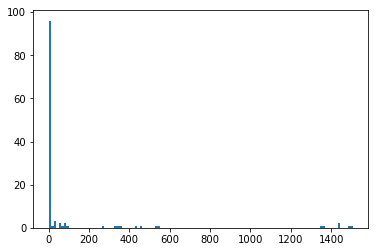

In [80]:
plt.hist(data_sorted.var().drop(['2B_AIT_002_PV','3_AIT_004_PV','2_DPIT_001_PV']),bins=120)

(array([97.,  1.,  2.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  1.]),
 array([   0.        ,   12.96384886,   25.92769773,   38.89154659,
          51.85539545,   64.81924431,   77.78309318,   90.74694204,
         103.7107909 ,  116.67463977,  129.63848863,  142.60233749,
         155.56618635,  168.53003522,  181.49388408,  194.45773294,
         207.42158181,  220.38543067,  233.349

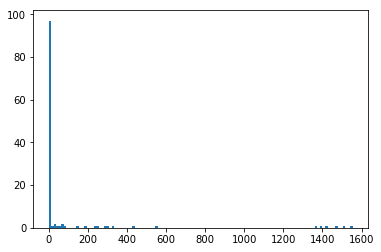

In [109]:
plt.hist(normal_data_sorted.var().drop(['\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\2_DPIT_001_PV','\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\3_AIT_004_PV','\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\3_AIT_002_PV']),bins=120)

In [243]:
data_sorted.var().describe()

count        123.000
mean      136410.928
std      1468432.166
min            0.000
25%            0.000
50%            0.018
75%            0.504
max     16283256.307
dtype: float64

In [182]:
# Applying Low Variance Filter on Attack Data.
data_sorted_variance = pd.DataFrame(data_sorted.var(), columns=['Variance'])
high_variance_features = data_sorted_variance[data_sorted_variance['Variance']>=0.018].index
feature_reduced_attack_data = data_sorted[high_variance_features]

In [198]:
normal_data_sorted.var().describe()

count       123.000
mean      70957.005
std      754192.653
min           0.000
25%           0.000
50%           0.016
75%           0.319
max     8360617.546
dtype: float64

In [205]:
# Applying Low Variance Filter on Normal Data.
normal_data_sorted_variance = pd.DataFrame(normal_data_sorted.var(), columns=['Variance'])
high_variance_features = normal_data_sorted_variance[normal_data_sorted_variance['Variance']>0.016].index
feature_reduced_normal_data = normal_data_sorted[high_variance_features]

In [351]:
feature_reduced_normal_data.shape

(1048571, 62)

### One Class SVM on low-variance filtered data

In [368]:
#Now let's try One-Class SVM on reduced data

clf = OneClassSVM(gamma='auto').fit(feature_reduced_normal_data.iloc[0:3000,:])

In [370]:
np.count_nonzero(clf.predict(feature_reduced_normal_data.iloc[:1000,:])==1)

331

In [298]:
np.count_nonzero(clf.predict(feature_reduced_attack_data[feature_reduced_attack_data.columns[:11].drop('1_AIT_002_PV')])==-1)

172801

In [294]:
feature_reduced_attack_data.columns[:11].drop('1_AIT_002_PV')

Index(['1_AIT_001_PV', '1_AIT_003_PV', '1_AIT_004_PV', '1_FIT_001_PV',
       '1_LT_001_PV', '1_MV_001_STATUS', '1_MV_004_STATUS', '1_P_001_STATUS',
       '1_P_003_STATUS', '1_P_005_STATUS'],
      dtype='object')

In [295]:
feature_reduced_attack_data[feature_reduced_attack_data.columns[:11].drop('1_AIT_002_PV')]

,1_AIT_001_PV,1_AIT_003_PV,1_AIT_004_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_003_STATUS,1_P_005_STATUS
0,164.210,11.997,482.480,0.001,48.482,1,1,1,1,1
1,164.210,11.997,482.480,0.001,48.482,1,1,1,1,1
2,164.210,11.997,482.480,0.001,48.482,1,1,1,1,1
3,164.210,11.997,482.480,0.001,48.482,1,1,1,1,1
4,164.210,11.997,482.480,0.001,48.482,1,1,1,1,1
5,164.210,11.997,482.480,0.001,48.482,1,1,1,1,1
6,164.212,11.995,482.474,0.001,48.403,1,1,1,1,1
7,164.212,11.995,482.474,0.001,48.403,1,1,1,1,1
8,164.212,11.995,482.474,0.001,48.403,1,1,1,1,1
9,164.212,11.995,482.474,0.001,48.403,1,1,1,1,1


### Isolation Forest on low-variance filtered data

In [299]:
from sklearn.ensemble import IsolationForest

In [458]:
clf = IsolationForest(contamination='auto',behaviour="deprecated").fit(feature_reduced_normal_data.iloc[0:2000,:10])

In [459]:
np.count_nonzero(clf.predict(feature_reduced_normal_data.iloc[:2000,:10])==1)

1332

In [460]:
clf.predict(feature_reduced_attack_data[feature_reduced_attack_data.columns[:11].drop('1_AIT_002_PV')].iloc[:100,:])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [405]:
np.count_nonzero(clf.predict(feature_reduced_attack_data[feature_reduced_attack_data.columns[:11].drop('1_AIT_002_PV')].iloc[:1000,:])==-1)

1000

In [213]:
feature_reduced_attack_data.corr()

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_FIT_001_PV,1_LT_001_PV,1_MV_001_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_003_STATUS,...,2_PIT_003_PV,2A_AIT_004_PV,2B_AIT_002_PV,2B_AIT_004_PV,3_AIT_003_PV,3_AIT_004_PV,3_FIT_001_PV,3_LT_001_PV,LEAK_DIFF_PRESSURE,TOTAL_CONS_REQUIRED_FLOW
1_AIT_001_PV,1.000,0.007,0.104,-0.045,0.096,-0.022,0.097,-0.048,0.095,0.095,...,0.091,-0.033,0.161,0.005,0.004,-0.002,0.005,-0.011,0.057,0.122
1_AIT_002_PV,0.007,1.000,0.041,0.018,0.081,-0.108,0.082,-0.051,0.081,0.081,...,-0.037,0.019,-0.051,-0.038,0.015,-0.014,-0.014,-0.075,-0.006,0.039
1_AIT_003_PV,0.104,0.041,1.000,0.229,0.094,0.000,0.092,0.005,0.092,0.091,...,0.021,-0.043,-0.135,-0.020,0.012,-0.005,0.019,-0.036,0.022,0.029
1_AIT_004_PV,-0.045,0.018,0.229,1.000,-0.514,-0.354,-0.519,-0.125,-0.505,-0.506,...,-0.385,0.551,-0.002,0.262,0.108,-0.071,0.133,-0.014,-0.238,-0.555
1_FIT_001_PV,0.096,0.081,0.094,-0.514,1.000,-0.121,0.970,-0.347,0.990,0.991,...,0.231,-0.259,-0.054,-0.108,-0.067,0.040,-0.140,-0.157,0.238,0.471
1_LT_001_PV,-0.022,-0.108,0.000,-0.354,-0.121,1.000,-0.120,0.642,-0.115,-0.115,...,0.003,-0.022,-0.082,-0.072,0.014,-0.004,0.042,0.036,-0.080,-0.160
1_MV_001_STATUS,0.097,0.082,0.092,-0.519,0.970,-0.120,1.000,-0.338,0.961,0.962,...,0.223,-0.258,-0.051,-0.107,-0.066,0.040,-0.132,-0.146,0.235,0.461
1_MV_004_STATUS,-0.048,-0.051,0.005,-0.125,-0.347,0.642,-0.338,1.000,-0.344,-0.344,...,-0.024,0.070,-0.130,0.045,0.042,-0.020,0.083,0.047,-0.105,-0.244
1_P_001_STATUS,0.095,0.081,0.092,-0.505,0.990,-0.115,0.961,-0.344,1.000,0.999,...,0.220,-0.247,-0.061,-0.098,-0.064,0.039,-0.146,-0.155,0.238,0.468
1_P_003_STATUS,0.095,0.081,0.091,-0.506,0.991,-0.115,0.962,-0.344,0.999,1.000,...,0.220,-0.247,-0.060,-0.098,-0.065,0.039,-0.147,-0.155,0.239,0.468


In [217]:
corr_matrix_normal_data = feature_reduced_normal_data.corr()

In [230]:
correlation_list =[] 
correlation_list_revised =[]
for index, rows in corr_matrix_normal_data.iterrows(): 
    correlation_list.append(rows)
for i in range(len(correlation_list)):
    for j in range(i+1,len(correlation_list[i])):
        correlation_list_revised.append(correlation_list[i][j])
len(correlation_list_revised)

1891

(array([  20.,   72.,  168.,  640., 1192.,  910.,  436.,  206.,   66.,
         134.]),
 array([-0.93051612, -0.73746451, -0.5444129 , -0.35136128, -0.15830967,
         0.03474194,  0.22779355,  0.42084516,  0.61389678,  0.80694839,
         1.        ]),
 <a list of 10 Patch objects>)

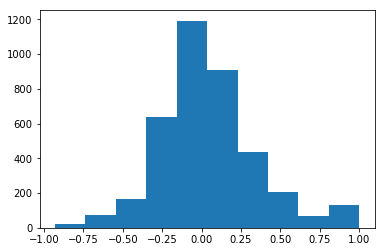

In [227]:
plt.hist(correlation_list_revised)

(array([2., 0., 0., ..., 0., 2., 5.]),
 array([-0.93051612, -0.92944361, -0.9283711 , ...,  0.99785498,
         0.99892749,  1.        ]),
 <a list of 1800 Patch objects>)

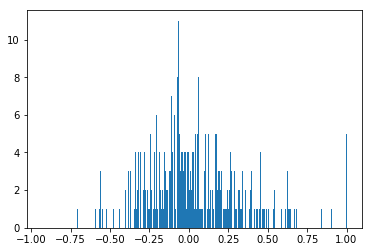

In [240]:
plt.hist(correlation_list_revised,bins=1800)

#### So by now we had seen that first we applied models directly to complete dataset which doesn't provided appropriate results. Then, we reduced the dimensions of dataset and again modelled it which resulted in improvement of the model's performance. But, still it is not considerable.
### Now, the next strategy is to separate the data in 3 subsequent processes (P1, P2 and P3) and apply PCA to confine a large part of the variance within a few principal components (features).

# P1 process

#### Here we'll apply PCA in two ways just to see how much difference it makes on result.
* First plot: Normal data will be fitted on PCA function and we'll only transform the attack data using fitted PCA.
* Second plot: Here, attack data itself, will be fit and transformed using PCA.

In [5]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(0.95)

In [8]:
# selecting P1 variables with 1_LT_001_PV in range (40,70)
P1_normal = normal_data_sorted[(normal_data_sorted['\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\1_LT_001_PV']>40) & (normal_data_sorted['\\\\WIN-25J4RO10SBF\\LOG_DATA\\SUTD_WADI\\LOG_DATA\\1_LT_001_PV']<70)]
P1_normal = P1_normal[P1_normal.columns[:19]]

In [9]:
P1_normal.describe()

,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_005_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_FIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_001_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_002_AL,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_MV_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_P_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_P_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_P_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_P_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_P_005_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_P_006_STATUS
count,961726.000,961714.000,961726.000,961720.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000,961726.000
mean,167.568,0.622,11.713,494.111,0.308,0.538,0.000,0.000,55.844,1.281,1.000,1.000,1.237,1.281,1.000,1.281,1.000,1.234,1.000
std,14.092,0.060,0.173,17.915,0.048,0.859,0.000,0.000,8.489,0.450,0.000,0.000,0.428,0.450,0.000,0.450,0.000,0.424,0.000
min,0.000,0.000,0.000,0.000,0.208,0.001,0.000,0.000,40.001,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,155.891,0.583,11.588,484.338,0.267,0.001,0.000,0.000,48.611,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
50%,163.121,0.625,11.778,496.938,0.312,0.001,0.000,0.000,56.628,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
75%,175.035,0.655,11.818,505.997,0.345,1.858,0.000,0.000,62.149,2.000,1.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,1.000
max,214.311,2.059,12.013,526.529,0.422,2.066,0.000,0.000,70.000,2.000,1.000,1.000,2.000,2.000,1.000,2.000,1.000,2.000,1.000


In [10]:
pca.fit(P1_normal.dropna())

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
normal_PC = pca.transform(P1_normal.dropna())

In [12]:
pca.explained_variance_ratio_

array([0.60433615, 0.27824022, 0.11554166])

#### It's awesome to see that these three components contain almost 99.8 % variance of complete data. 

In [13]:
normal_PC = pd.DataFrame(data = normal_PC
             , columns = ['PC1', 'PC2', 'PC3'])

In [14]:
normal_PC.describe()

,PC1,PC2,PC3
count,961708.000,961708.000,961708.000
mean,0.000,-0.000,0.000
std,18.936,12.848,8.280
min,-48.130,-21.643,-16.720
25%,-11.616,-10.058,-6.409
50%,-0.356,-2.684,-0.460
75%,11.353,6.906,6.917
max,517.782,52.103,61.828


In [22]:
# before proceeding further let's first remove some outliers from the normal data so that 
# the data become consistent and appropriate for analysis.
normal_PC = normal_PC[(normal_PC['PC1']<100)]

In [27]:
# These are the new statistics of normal data
normal_PC.describe()

,PC1,PC2,PC3
count,961623.000,961623.000,961623.000
mean,-0.046,-0.004,-0.004
std,18.303,12.840,8.267
min,-48.130,-21.643,-16.720
25%,-11.617,-10.058,-6.410
50%,-0.358,-2.685,-0.462
75%,11.350,6.902,6.914
max,59.600,44.231,21.240


In [28]:
normal_PC.head()

,PC1,PC2,PC3
0,-11.694,-2.123,6.789
1,-11.694,-2.123,6.789
2,-11.694,-2.123,6.789
3,-11.731,-2.153,6.924
4,-11.731,-2.153,6.924


Now let's try to apply the same for the attack data

In [104]:
attack_PC = pca.transform(attack_data[attack_data.columns[3:22]].dropna())

In [ ]:
pca.fit_transform

#### Here again we obtained around 99.83 % variance of complete data.

In [105]:
attack_PC = pd.DataFrame(data = attack_PC
             , columns = ['PC1', 'PC2', 'PC3'])

In [106]:
attack_PC.describe()

,PC1,PC2,PC3
count,172795.000,172795.000,172795.000
mean,32.752,24.209,6.201
std,18.700,19.030,8.293
min,-154.241,-1.151,-11.174
25%,19.668,16.157,-0.012
50%,31.937,23.026,5.025
75%,45.057,30.612,12.568
max,518.222,441.598,64.498


In [20]:
# Although removing outliers in attack data is not meaningful but for the visualization 
# that we are going to plot it is better to clean the extreme outliers out of it.
attack_PC = attack_PC[(attack_PC['PC1']<=100) & (attack_PC['PC1']>=-100)]

In [22]:
# The new statistics of PCA reduced attack data is
attack_PC.describe()

,PC1,PC2,PC3
count,172503.000,172503.000,172503.000
mean,32.974,23.556,6.134
std,16.399,9.597,8.136
min,2.103,-1.151,-11.174
25%,19.737,16.143,-0.016
50%,31.967,22.999,5.007
75%,45.078,30.568,12.524
max,71.790,46.524,27.345


In [23]:
attack_PC.head()

,PC1,PC2,PC3
0,11.289,0.717,8.455
1,11.289,0.717,8.455
2,11.289,0.717,8.455
3,11.289,0.717,8.455
4,11.289,0.717,8.455


### So, by now we had successfully reduced normal and attack data into 3 principal components each. Let's try to visualize them now.

In [22]:
from mpl_toolkits import mplot3d

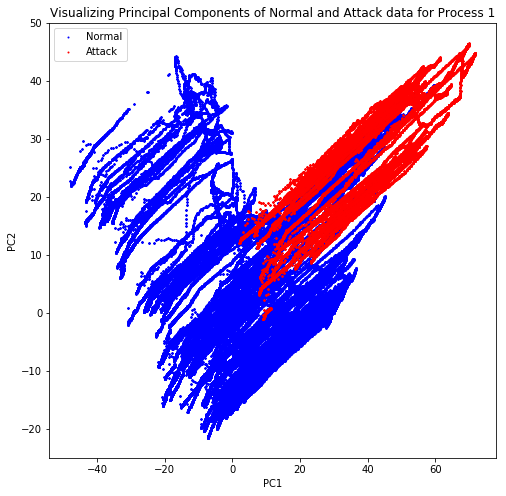

In [45]:
# First, let's try to see whether by plotting only first two PC, can we differentiate 
# between the data points.
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
#sample_normal = normal_PC.sample(n=100000)
PC1_normal = normal_PC['PC1']
PC2_normal = normal_PC['PC2']
ax.scatter(PC1_normal, PC2_normal, s=1,c ='b');
PC1_attack = attack_PC['PC1']
PC2_attack = attack_PC['PC2']
ax.scatter(PC1_attack, PC2_attack, s=1,c ='r');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(['Normal','Attack'])
ax.set_title('Visualizing Principal Components of Normal and Attack data for Process 1')
plt.show()

#### Note that the above graph is plotted by removing some extreme outliers from the transformed PC attack data.

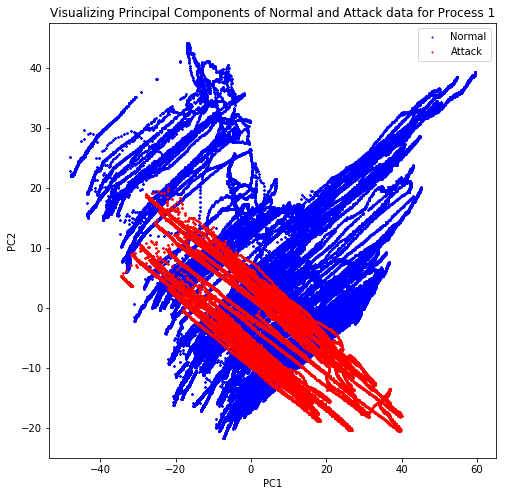

In [31]:
# First, let's try to see whether by plotting only first two PC, can we differentiate 
# between the data points.
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
#sample_normal = normal_PC.sample(n=100000)
PC1_normal = normal_PC['PC1']
PC2_normal = normal_PC['PC2']
ax.scatter(PC1_normal, PC2_normal, s=1,c ='b');
PC1_attack = attack_PC['PC1']
PC2_attack = attack_PC['PC2']
ax.scatter(PC1_attack, PC2_attack, s=1,c ='r');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(['Normal','Attack'])
ax.set_title('Visualizing Principal Components of Normal and Attack data for Process 1')
plt.show()

#### The above graph is plotted by removing some extreme outliers from the transformed and fit-transformed PC attack data respectively. The difference in these two plots is pretty clear.

#### Above charts represents that not all the data points in attack log are actually anomalies. Infact, it seems based on the two plotted PCs that most entries of attack data in Process 1 are under the standard operation as observed in normal data. Next, we need to detect the attacks that has been conducted on process 1 by modelling the principal component reduced normal data.

## Before training the model, let's first arrange all the actual attacks in a dataframe.

In [107]:
actual_attacks = attack_data.iloc[attack_PC.index][['Date','Time']]
actual_attacks['DateTime'] = actual_attacks['Date']+' '+actual_attacks['Time']

In [108]:
actual_attacks['datetime'] = list(pd.to_datetime(actual_attacks['DateTime']))

In [109]:
actual_attacks['state'] = 1

In [110]:
# Now we'll set the datetime column as index for better accessibility of the dataframe.
actual_attacks = actual_attacks.set_index('datetime')

In [121]:
# Let's take out the datetime index of actual attacks by slicing the data based on attack time durations provided 
# in the attack details file for all the 15 attacks.
timestamps_attack = pd.concat([actual_attacks.loc['2017-10-09 19:25:00':'2017-10-09 19:50:16'],
                           actual_attacks.loc['2017-10-10 10:24:10':'2017-10-10 10:34:00'],
                           actual_attacks.loc['2017-10-10 10:55:00':'2017-10-10 11:24:00'],
                           actual_attacks.loc['2017-10-10 11:30:40':'2017-10-10 11:44:50'],
                           actual_attacks.loc['2017-10-10 13:39:30':'2017-10-10 13:50:40'],
                           actual_attacks.loc['2017-10-10 14:48:17':'2017-10-10 14:59:55'],
                           actual_attacks.loc['2017-10-10 17:40:00':'2017-10-10 17:49:40'],
                           actual_attacks.loc['2017-10-11 10:55:00':'2017-10-11 10:56:27'],
                           actual_attacks.loc['2017-10-11 11:17:54':'2017-10-11 11:31:20'],
                           actual_attacks.loc['2017-10-11 11:36:31':'2017-10-11 11:47:00'],
                           actual_attacks.loc['2017-10-11 11:59:00':'2017-10-11 12:05:00'],
                           actual_attacks.loc['2017-10-11 12:07:30':'2017-10-11 12:10:52'],
                           actual_attacks.loc['2017-10-11 12:16:00':'2017-10-11 12:25:36'],
                           actual_attacks.loc['2017-10-11 15:26:30':'2017-10-11 15:37:00']]).index

In [123]:
# Let's change the state of above timestamps to -1 (which mean attack) in the actual_attacks data
actual_attacks.loc[timestamps_attack,'state'] = -1

In [127]:
actual_attacks['state'].value_counts()

 1    162847
-1      9948
Name: state, dtype: int64

#### Above, we have successfully arranged actual classified attacks data where 1 means normal and -1 are the points when we attacked the system. Hereafter, we'll train different models and then compare the model predictions of attacks with above actual attack data in order to compute confusion matrix.

### Now, it's time to model the PC reduced normal data using different algorithms.

## ---> One Class SVM on Principal Component reconstructed Process 1 normal data

In [128]:
from sklearn.svm import OneClassSVM

In [193]:
# defining the model with its parameters. One thing to note here is varying the parameters will have a significant
# impact on the outcome of model predictions on attack data. Thus it needs to be adjusted accordingly.
OC_SVM = OneClassSVM(gamma='scale',nu=0.0001)

In [194]:
OC_SVM.fit(normal_PC.sample(500000))

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.0001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [195]:
# Let's predict how many data points has been identified as normal in attack data.
print(np.count_nonzero(OC_SVM.predict(attack_PC)==1),'data points has been identified as normal')

153976 data points has been identified as normal


In [144]:
# Now before predicting attack data let's first make a space to store the predictions in parallel to its
# corresponding timeframe by defining a variable
P1_attack_predicted = attack_data.loc[attack_PC.index][['Date','Time']]
P1_attack_predicted.head()

,Date,Time
0,10/9/2017,6:00:00.000 PM
1,10/9/2017,6:00:01.000 PM
2,10/9/2017,6:00:02.000 PM
3,10/9/2017,6:00:03.000 PM
4,10/9/2017,6:00:04.000 PM


In [145]:
# Now let's add a column of Date + Time which will be helpful for us in visualization later.
P1_attack_predicted['DateTime'] = P1_attack_predicted['Date']+' '+P1_attack_predicted['Time']
P1_attack_predicted.head()

,Date,Time,DateTime
0,10/9/2017,6:00:00.000 PM,10/9/2017 6:00:00.000 PM
1,10/9/2017,6:00:01.000 PM,10/9/2017 6:00:01.000 PM
2,10/9/2017,6:00:02.000 PM,10/9/2017 6:00:02.000 PM
3,10/9/2017,6:00:03.000 PM,10/9/2017 6:00:03.000 PM
4,10/9/2017,6:00:04.000 PM,10/9/2017 6:00:04.000 PM


In [146]:
P1_attack_predicted['datetime'] = list(pd.to_datetime(P1_attack_predicted['DateTime']))

In [196]:
# Let's store these predictions in a separate column in P1_attack_predicted for better comparison
P1_attack_predicted['predictions'] = OC_SVM.predict(attack_PC)
P1_attack_predicted.head()

,Date,Time,DateTime,datetime,predictions
0,10/9/2017,6:00:00.000 PM,10/9/2017 6:00:00.000 PM,2017-10-09 18:00:00,1
1,10/9/2017,6:00:01.000 PM,10/9/2017 6:00:01.000 PM,2017-10-09 18:00:01,1
2,10/9/2017,6:00:02.000 PM,10/9/2017 6:00:02.000 PM,2017-10-09 18:00:02,1
3,10/9/2017,6:00:03.000 PM,10/9/2017 6:00:03.000 PM,2017-10-09 18:00:03,1
4,10/9/2017,6:00:04.000 PM,10/9/2017 6:00:04.000 PM,2017-10-09 18:00:04,1


In [151]:
# Let's slice the entries which are predicted as outlier (attacked). We will use these points to visualize the
# instances predicted as attacks with the time.
# Here, -1 is the notation for attack predictions
predicted_attacks = P1_attack_predicted[P1_attack_predicted['predictions']==-1]

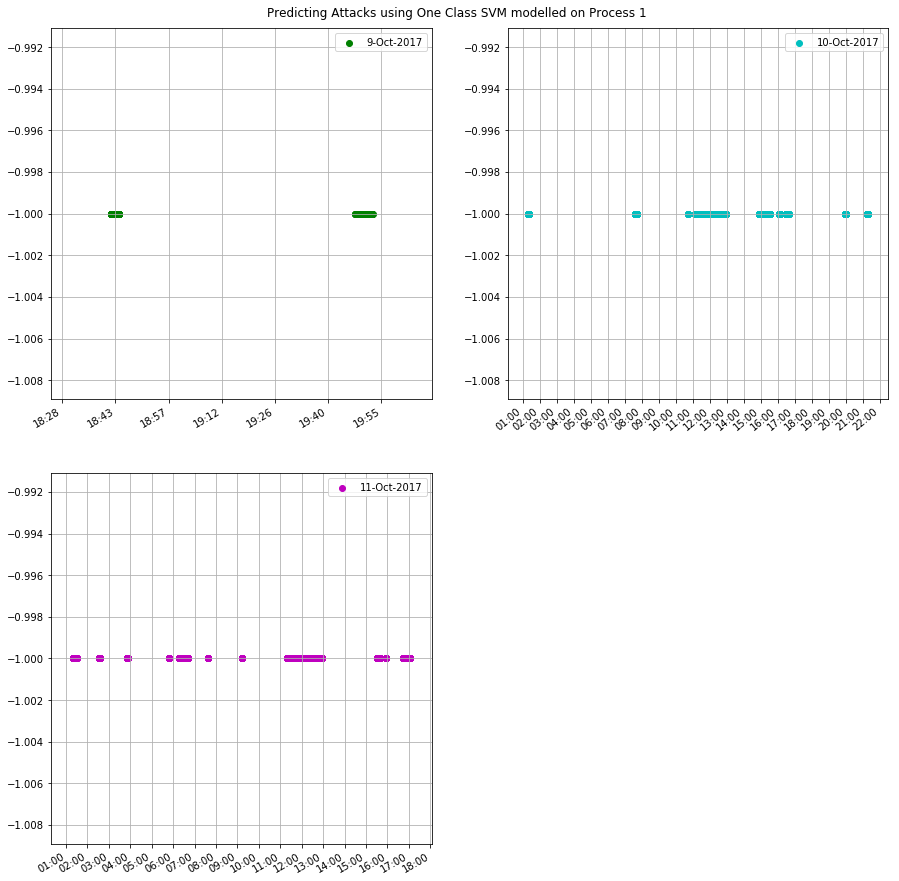

In [322]:
# Above plot can be simplified for better understanding

# Let's first specify some customized formatting for the plot
#fig, axs = plt.subplots(3,figsize=(10,10))
figure = plt.figure(figsize=(15,15)) 
formatter = mpldates.DateFormatter('%H:%M') 
plt.suptitle('Predicting Attacks using One Class SVM modelled on Process 1',y=0.9)


#Plot for 9th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/9/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,1)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/9/2017']['predictions'],c='g') 
axes.legend(['9-Oct-2017'])
#plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

#Plot for 10th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/10/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,2)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions'],c='c') 
axes.legend(['10-Oct-2017'])
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=40, ha='right')
plt.grid()

#Plot for 11th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/11/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,3)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/11/2017']['predictions'],c='m') 
axes.legend(['11-Oct-2017'])
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

plt.show()


In [597]:
# By running the code below we can see that the level indicator 1_LT_001_PV value crossed 70, 22 minutes after
# the attack started
attack_data.iloc[6440:6450,[1,2,11]]

,Date,Time,1_LT_001_PV
6440,10/9/2017,7:47:20.000 PM,70.000
6441,10/9/2017,7:47:21.000 PM,70.000
6442,10/9/2017,7:47:22.000 PM,70.000
6443,10/9/2017,7:47:23.000 PM,70.000
6444,10/9/2017,7:47:24.000 PM,70.000
6445,10/9/2017,7:47:25.000 PM,70.000
6446,10/9/2017,7:47:26.000 PM,70.238
6447,10/9/2017,7:47:27.000 PM,70.238
6448,10/9/2017,7:47:28.000 PM,70.238
6449,10/9/2017,7:47:29.000 PM,70.238


### Note: There is a ambiguity in the prediction of attack imposed on 9th Oct on Process 1. According to the attack details the attack started at 19:25:00 which should result in overflow of primary tank. But the level indicator 1_LT_001_PV went above 70 (high setpoint) at 19:47:26. That's why the model started indicating anomaly at that time.

#### Time to compute the Confusion Matrix to check the performance of our model.

In [158]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [200]:
print(confusion_matrix(actual_attacks['state'],P1_attack_predicted['predictions'],labels=[1,-1]))

[[148772  14075]
 [  5204   4744]]


In [198]:
print('Accuracy Score:', accuracy_score(actual_attacks['state'],P1_attack_predicted['predictions']))

Accuracy Score: 0.888428484620504


In [199]:
print(classification_report(actual_attacks['state'],P1_attack_predicted['predictions']))

              precision    recall  f1-score   support

          -1       0.25      0.48      0.33      9948
           1       0.97      0.91      0.94    162847

   micro avg       0.89      0.89      0.89    172795
   macro avg       0.61      0.70      0.63    172795
weighted avg       0.93      0.89      0.90    172795



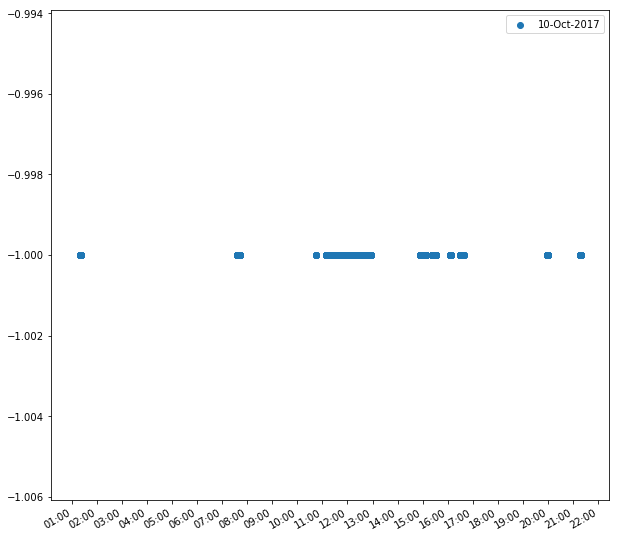

In [227]:
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/10/2017']['datetime']] 
x = mpldates.date2num(a) 
formatter = matplotlib.dates.DateFormatter('%H:%M') 

figure = plt.figure(figsize=(10,10)) 
axes = figure.add_subplot(1, 1, 1) 
  
axes.xaxis.set_major_formatter(formatter) 

axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions']) 
axes.legend(['10-Oct-2017'])
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.gcf().autofmt_xdate()

plt.show() #plt.plot(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions'])

## ---> Isolation Forest on Principal Component reconstructed Process 1 normal data

In [323]:
from sklearn.ensemble import IsolationForest

In [243]:
# Here again, we'll tune the parameters in accordance to provide the best outputs.
Isolation_Forest = IsolationForest(contamination=0.0001, n_estimators=300, behaviour='new')

In [246]:
Isolation_Forest.fit(normal_PC.sample(200000))

IsolationForest(behaviour='new', bootstrap=False, contamination=0.0001,
        max_features=1.0, max_samples='auto', n_estimators=300,
        n_jobs=None, random_state=None, verbose=0)

In [247]:
# Let's predict how many data points has been identified as normal in attack data.
print(np.count_nonzero(Isolation_Forest.predict(attack_PC)==1),'data points has been identified as normal')

162579 data points has been identified as normal


In [615]:
# Here again, before predicting attack data let's first make a space to store the predictions in parallel to its
# corresponding timeframe by defining a variable
P1_attack_predicted = attack_data.loc[attack_PC.index][['Date','Time']]
P1_attack_predicted.head()

,Date,Time
0,10/9/2017,6:00:00.000 PM
1,10/9/2017,6:00:01.000 PM
2,10/9/2017,6:00:02.000 PM
3,10/9/2017,6:00:03.000 PM
4,10/9/2017,6:00:04.000 PM


In [616]:
# Let's now join the date and time column in order to perform 'pd.to_datetime' operation on them
P1_attack_predicted['DateTime'] = P1_attack_predicted['Date']+' '+P1_attack_predicted['Time']
P1_attack_predicted

,Date,Time,DateTime
0,10/9/2017,6:00:00.000 PM,10/9/2017 6:00:00.000 PM
1,10/9/2017,6:00:01.000 PM,10/9/2017 6:00:01.000 PM
2,10/9/2017,6:00:02.000 PM,10/9/2017 6:00:02.000 PM
3,10/9/2017,6:00:03.000 PM,10/9/2017 6:00:03.000 PM
4,10/9/2017,6:00:04.000 PM,10/9/2017 6:00:04.000 PM
5,10/9/2017,6:00:05.000 PM,10/9/2017 6:00:05.000 PM
6,10/9/2017,6:00:06.000 PM,10/9/2017 6:00:06.000 PM
7,10/9/2017,6:00:07.000 PM,10/9/2017 6:00:07.000 PM
8,10/9/2017,6:00:08.000 PM,10/9/2017 6:00:08.000 PM
9,10/9/2017,6:00:09.000 PM,10/9/2017 6:00:09.000 PM


In [238]:
# Let's store these predictions in a separate column in P1_attack_predicted for better comparison
P1_attack_predicted['predictions'] = Isolation_Forest.predict(attack_PC)
P1_attack_predicted.head()

,Date,Time,DateTime,datetime,predictions
0,10/9/2017,6:00:00.000 PM,10/9/2017 6:00:00.000 PM,2017-10-09 18:00:00,1
1,10/9/2017,6:00:01.000 PM,10/9/2017 6:00:01.000 PM,2017-10-09 18:00:01,1
2,10/9/2017,6:00:02.000 PM,10/9/2017 6:00:02.000 PM,2017-10-09 18:00:02,1
3,10/9/2017,6:00:03.000 PM,10/9/2017 6:00:03.000 PM,2017-10-09 18:00:03,1
4,10/9/2017,6:00:04.000 PM,10/9/2017 6:00:04.000 PM,2017-10-09 18:00:04,1


In [618]:
# Let's slice the entries which are predicted as outlier (attacked). 
# Here, -1 is the notation for attack predictions
predicted_attacks = P1_attack_predicted[P1_attack_predicted['predictions']==-1]

In [619]:
predicted_attacks['datetime'] = list(pd.to_datetime(predicted_attacks['DateTime']))

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


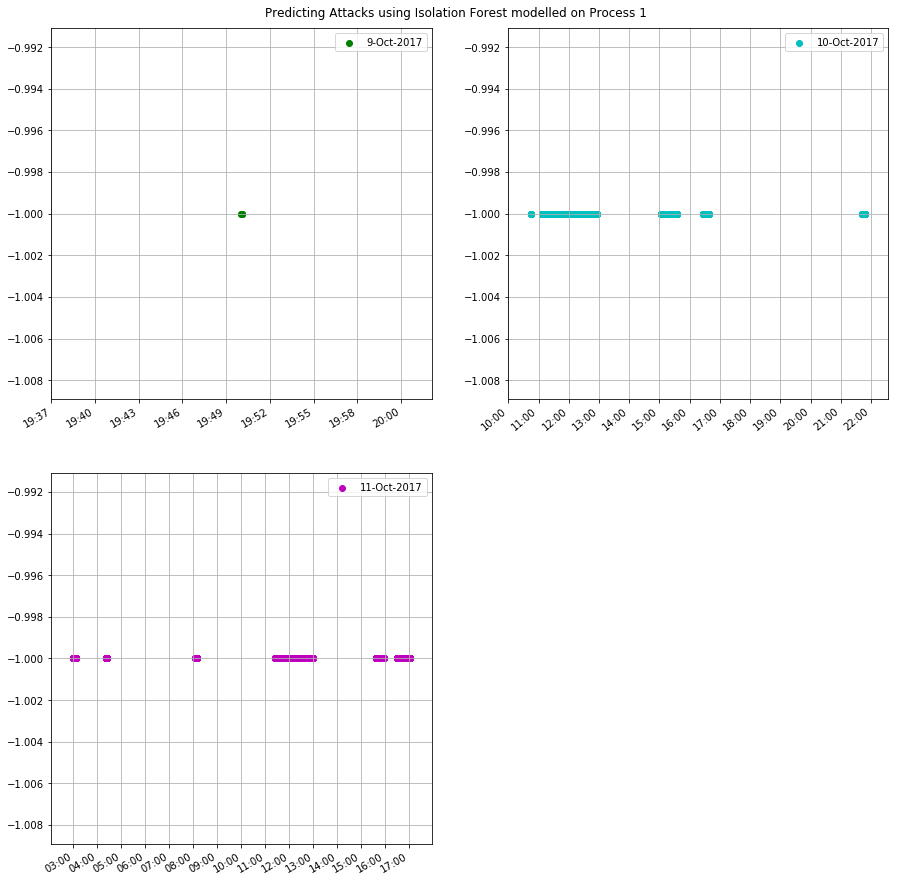

In [527]:
# Above plot can be simplified for better understanding

# Let's first specify some customized formatting for the plot
#fig, axs = plt.subplots(3,figsize=(10,10))
figure = plt.figure(figsize=(15,15)) 
formatter = mpldates.DateFormatter('%H:%M') 
plt.suptitle('Predicting Attacks using Isolation Forest modelled on Process 1',y=0.9)


#Plot for 9th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/9/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,1)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/9/2017']['predictions'],c='g') 
axes.legend(['9-Oct-2017'])
#plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

#Plot for 10th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/10/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,2)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions'],c='c') 
axes.legend(['10-Oct-2017'])
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=40, ha='right')
plt.grid()

#Plot for 11th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/11/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,3)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/11/2017']['predictions'],c='m') 
axes.legend(['11-Oct-2017'])
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

plt.show()

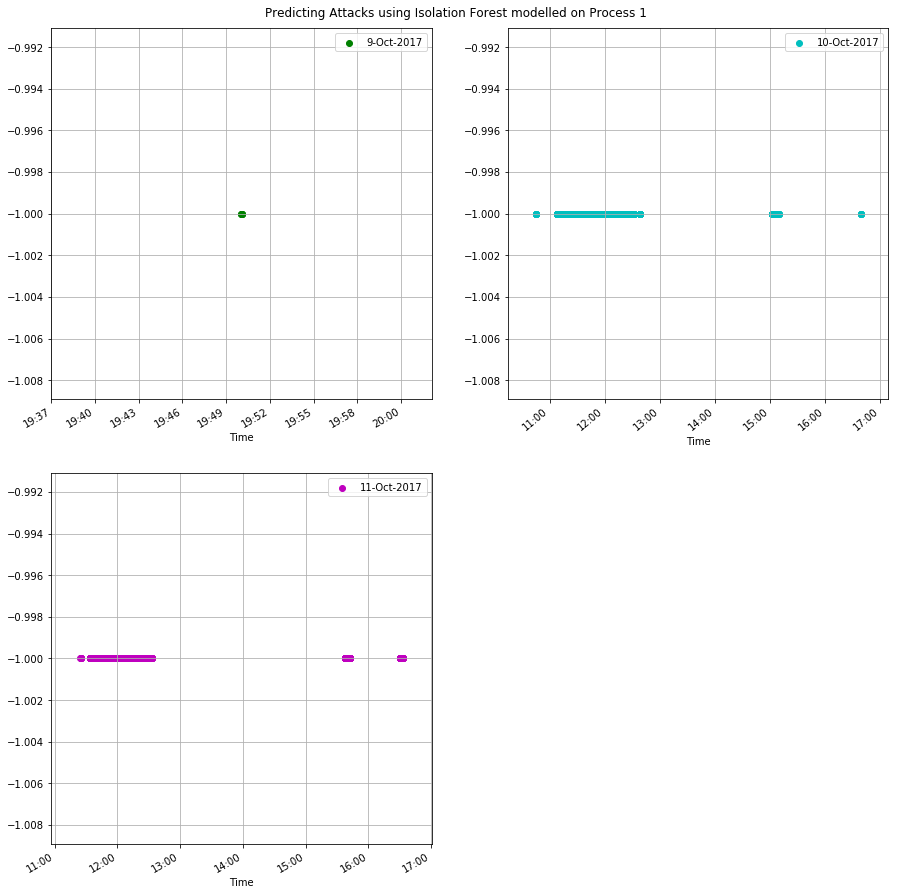

In [620]:
# Above plot can be simplified for better understanding

# Let's first specify some customized formatting for the plot
#fig, axs = plt.subplots(3,figsize=(10,10))
figure = plt.figure(figsize=(15,15)) 
formatter = mpldates.DateFormatter('%H:%M') 
plt.suptitle('Predicting Attacks using Isolation Forest modelled on Process 1',y=0.9)


#Plot for 9th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/9/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,1)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/9/2017']['predictions'],c='g') 
axes.legend(['9-Oct-2017'])
axes.set_xlabel('Time')
#plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

#Plot for 10th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/10/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,2)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions'],c='c') 
axes.legend(['10-Oct-2017'])
axes.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=40, ha='right')
plt.grid()

#Plot for 11th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/11/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,3)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/11/2017']['predictions'],c='m') 
axes.legend(['11-Oct-2017'])
axes.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

plt.show()

### Some observations from above plot:
* Isolation Forest has been able to predict more instances as normal compared to One Class SVM.
* Although, Isolation Forest has reduced number of false alarms by a signifant amount but on the counter part it's less precise and delayed in detecting attacks. This technique has been able to locate only some major deviations.

#### Time to compute the Confusion Matrix to check the performance of our model.

In [158]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [242]:
print(confusion_matrix(actual_attacks['state'],P1_attack_predicted['predictions'],labels=[1,-1]))

[[157635   5212]
 [  6671   3277]]


In [240]:
print('Accuracy Score:', accuracy_score(actual_attacks['state'],P1_attack_predicted['predictions']))

Accuracy Score: 0.9312306490349836


In [241]:
print(classification_report(actual_attacks['state'],P1_attack_predicted['predictions']))

              precision    recall  f1-score   support

          -1       0.39      0.33      0.36      9948
           1       0.96      0.97      0.96    162847

   micro avg       0.93      0.93      0.93    172795
   macro avg       0.67      0.65      0.66    172795
weighted avg       0.93      0.93      0.93    172795



## ---> Elliptic Envelope on Principal Component reconstructed Process 1 normal data

In [621]:
from sklearn.covariance import EllipticEnvelope

In [218]:
# Here again, we'll tune the parameters in accordance to provide the best outputs.
Elliptic_Envelope = EllipticEnvelope(contamination=0.001)

In [219]:
Elliptic_Envelope.fit(normal_PC.sample(100000))

EllipticEnvelope(assume_centered=False, contamination=0.001,
         random_state=None, store_precision=True, support_fraction=None)

In [220]:
# Let's predict how many data points has been identified as normal in attack data.
print(np.count_nonzero(Elliptic_Envelope.predict(attack_PC)==1),'data points has been identified as normal')

157496 data points has been identified as normal


In [670]:
# Here again, before predicting attack data let's first make a space to store the predictions in parallel to its
# corresponding timeframe by defining a variable
P1_attack_predicted = attack_data.loc[attack_PC.index][['Date','Time']]
P1_attack_predicted.head()

,Date,Time
0,10/9/2017,6:00:00.000 PM
1,10/9/2017,6:00:01.000 PM
2,10/9/2017,6:00:02.000 PM
3,10/9/2017,6:00:03.000 PM
4,10/9/2017,6:00:04.000 PM


In [671]:
# Let's now join the date and time column in order to perform 'pd.to_datetime' operation on them
P1_attack_predicted['DateTime'] = P1_attack_predicted['Date']+' '+P1_attack_predicted['Time']
P1_attack_predicted

,Date,Time,DateTime
0,10/9/2017,6:00:00.000 PM,10/9/2017 6:00:00.000 PM
1,10/9/2017,6:00:01.000 PM,10/9/2017 6:00:01.000 PM
2,10/9/2017,6:00:02.000 PM,10/9/2017 6:00:02.000 PM
3,10/9/2017,6:00:03.000 PM,10/9/2017 6:00:03.000 PM
4,10/9/2017,6:00:04.000 PM,10/9/2017 6:00:04.000 PM
5,10/9/2017,6:00:05.000 PM,10/9/2017 6:00:05.000 PM
6,10/9/2017,6:00:06.000 PM,10/9/2017 6:00:06.000 PM
7,10/9/2017,6:00:07.000 PM,10/9/2017 6:00:07.000 PM
8,10/9/2017,6:00:08.000 PM,10/9/2017 6:00:08.000 PM
9,10/9/2017,6:00:09.000 PM,10/9/2017 6:00:09.000 PM


In [221]:
# Let's store these predictions in a separate column in P1_attack_predicted for better comparison
P1_attack_predicted['predictions'] = Elliptic_Envelope.predict(attack_PC)
P1_attack_predicted.head()

,Date,Time,DateTime,datetime,predictions
0,10/9/2017,6:00:00.000 PM,10/9/2017 6:00:00.000 PM,2017-10-09 18:00:00,1
1,10/9/2017,6:00:01.000 PM,10/9/2017 6:00:01.000 PM,2017-10-09 18:00:01,1
2,10/9/2017,6:00:02.000 PM,10/9/2017 6:00:02.000 PM,2017-10-09 18:00:02,1
3,10/9/2017,6:00:03.000 PM,10/9/2017 6:00:03.000 PM,2017-10-09 18:00:03,1
4,10/9/2017,6:00:04.000 PM,10/9/2017 6:00:04.000 PM,2017-10-09 18:00:04,1


In [673]:
# Let's slice the entries which are predicted as outlier (attacked). 
# Here, -1 is the notation for attack predictions
predicted_attacks = P1_attack_predicted[P1_attack_predicted['predictions']==-1]

In [674]:
predicted_attacks['datetime'] = list(pd.to_datetime(predicted_attacks['DateTime']))

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


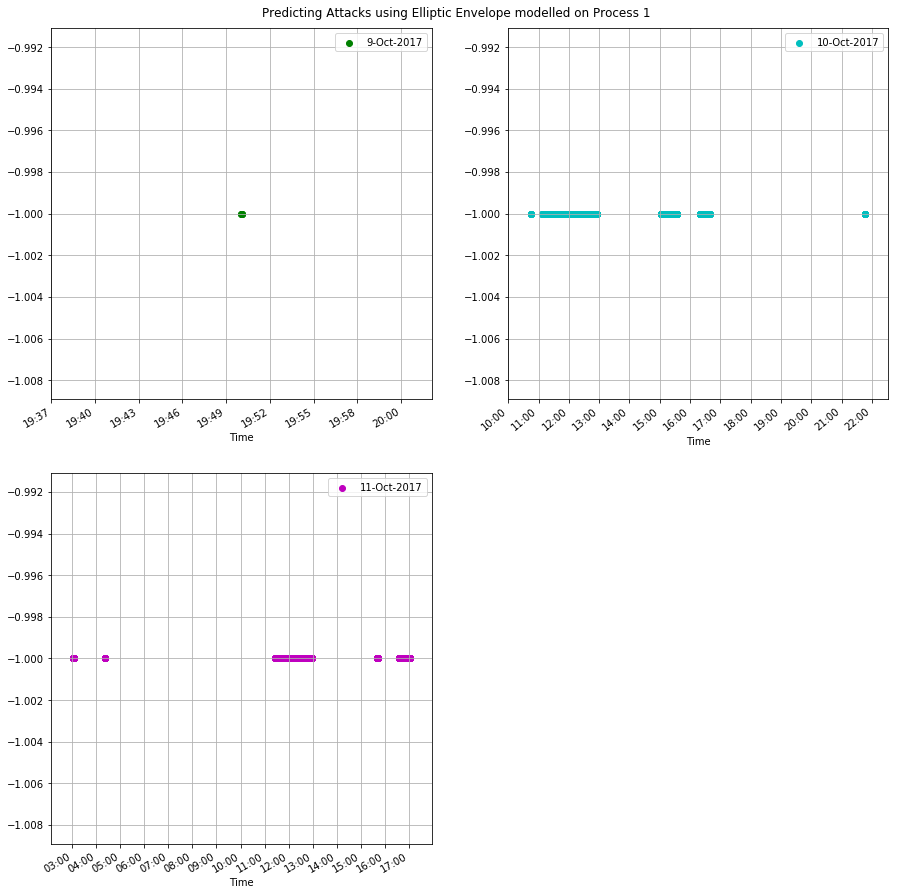

In [660]:
# Above plot can be simplified for better understanding

# Let's first specify some customized formatting for the plot
#fig, axs = plt.subplots(3,figsize=(10,10))
figure = plt.figure(figsize=(15,15)) 
formatter = mpldates.DateFormatter('%H:%M') 
plt.suptitle('Predicting Attacks using Elliptic Envelope modelled on Process 1',y=0.9)


#Plot for 9th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/9/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,1)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/9/2017']['predictions'],c='g') 
axes.legend(['9-Oct-2017'])
axes.set_xlabel('Time')
#plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

#Plot for 10th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/10/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,2)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions'],c='c') 
axes.legend(['10-Oct-2017'])
axes.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=40, ha='right')
plt.grid()

#Plot for 11th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/11/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,3)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/11/2017']['predictions'],c='m') 
axes.legend(['11-Oct-2017'])
axes.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

plt.show()

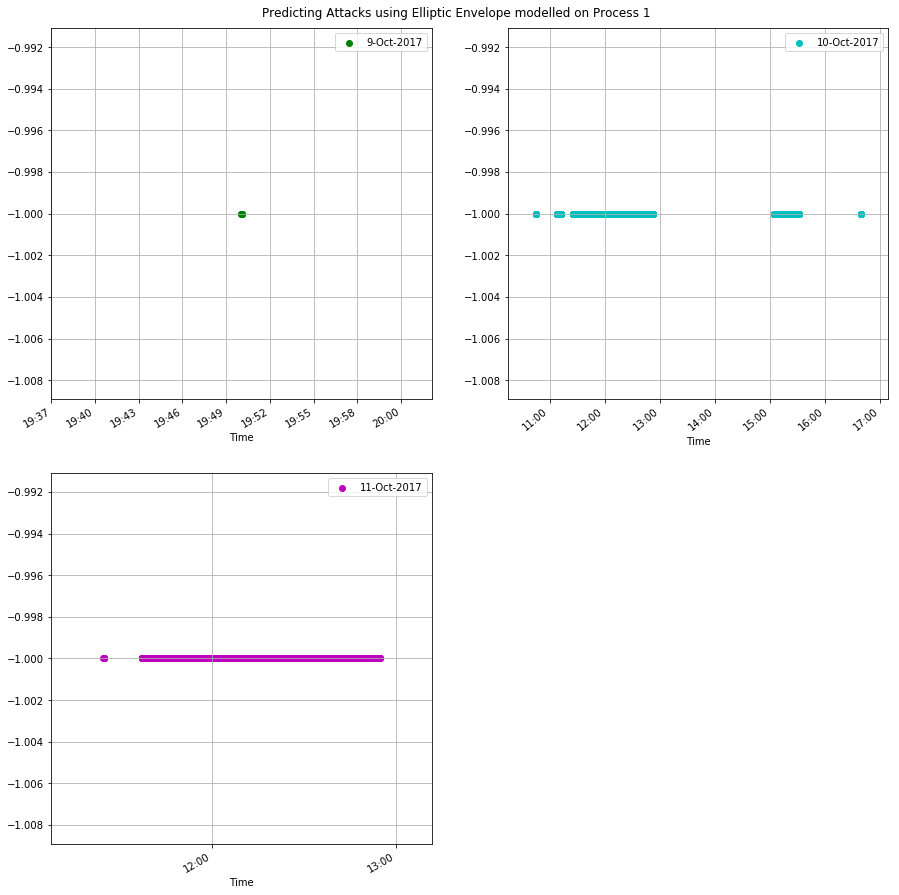

In [675]:
# Above plot can be simplified for better understanding

# Let's first specify some customized formatting for the plot
#fig, axs = plt.subplots(3,figsize=(10,10))
figure = plt.figure(figsize=(15,15)) 
formatter = mpldates.DateFormatter('%H:%M') 
plt.suptitle('Predicting Attacks using Elliptic Envelope modelled on Process 1',y=0.9)


#Plot for 9th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/9/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,1)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/9/2017']['predictions'],c='g') 
axes.legend(['9-Oct-2017'])
axes.set_xlabel('Time')
#plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

#Plot for 10th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/10/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,2)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/10/2017']['predictions'],c='c') 
axes.legend(['10-Oct-2017'])
axes.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=40, ha='right')
plt.grid()

#Plot for 11th Oct 2017
a = [datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in predicted_attacks[predicted_attacks['Date']=='10/11/2017']['datetime']] 
x = mpldates.date2num(a) 
axes = figure.add_subplot(2,2,3)
axes.xaxis.set_major_formatter(formatter) 
axes.scatter(x,predicted_attacks[predicted_attacks['Date']=='10/11/2017']['predictions'],c='m') 
axes.legend(['11-Oct-2017'])
axes.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(mpldates.HourLocator())
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.grid()

plt.show()

#### Time to compute the Confusion Matrix to check the performance of our model.

In [158]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [222]:
print(confusion_matrix(actual_attacks['state'],P1_attack_predicted['predictions'],labels=[1,-1]))

[[150770  12077]
 [  6726   3222]]


In [223]:
print('Accuracy Score:', accuracy_score(actual_attacks['state'],P1_attack_predicted['predictions']))

Accuracy Score: 0.8911831939581585


In [224]:
print(classification_report(actual_attacks['state'],P1_attack_predicted['predictions']))

              precision    recall  f1-score   support

          -1       0.21      0.32      0.26      9948
           1       0.96      0.93      0.94    162847

   micro avg       0.89      0.89      0.89    172795
   macro avg       0.58      0.62      0.60    172795
weighted avg       0.91      0.89      0.90    172795



### Here, we conclude the analysis of Process 1. Next we'll start analyzing Process 2.

# Process P2

### Here again, we'll proceed with almost similar strategy to above.

In [6]:
# Let's first extract Process 2 normal data variables
P2_normal = normal_data_sorted[normal_data_sorted.columns[19:105]]

In [7]:
# There is a need to remove some variables from above data before applying PCA.
variables_toremove = list(normal_data_sorted[normal_data_sorted.columns[19:105]].columns[[40,49,50,78,79,80,81,82,83,84,85]])

In [8]:
P2_normal.shape

(1048571, 86)

In [9]:
P2_normal = P2_normal.drop(variables_toremove, axis=1)
P2_normal.shape

(1048571, 75)

Those 11 variables has been succesfully removed.

In [10]:
# Time to implement PCA on this data
pca = PCA(0.95)

In [11]:
pca.fit(P2_normal)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_

array([0.65407832, 0.15775298, 0.06693462, 0.02806778, 0.0202405 ,
       0.01516197, 0.01360239])

### Here, 7 principal components has been formed which contains about 95% of total data variance.

In [384]:
P2_normal_PC = pca.transform(P2_normal)

In [385]:
P2_normal_PC = pd.DataFrame(data = P2_normal_PC
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [386]:
P2_normal_PC.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000,1048571.000
mean,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000
std,138.865,68.197,44.423,28.766,24.428,21.142,20.026
min,-260.626,-169.351,-83.026,-87.787,-63.056,-93.621,-89.970
25%,-65.299,-62.890,-32.229,-10.584,-16.772,-6.048,-7.615
50%,-23.538,10.916,-7.512,-1.130,-1.298,0.156,0.540
75%,23.395,59.861,24.071,12.221,10.345,4.954,6.014
max,2478.567,582.280,150.553,120.475,149.577,97.695,96.591


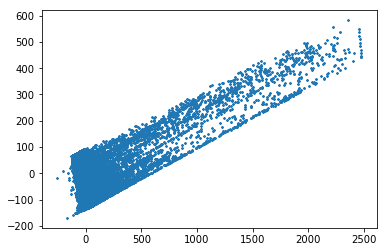

In [387]:
# It looks like there are some extreme outliers points in above data. Let's try to visualize them.
plt.scatter(P2_normal_PC['PC1'],P2_normal_PC['PC2'],s=1)

#### Now let's try to prepare attack data before applying to PCA

In [16]:
P2_attack = attack_data[attack_data.columns[22:112]]

In [17]:
P2_attack.shape

(172801, 90)

In [18]:
# Here again we need to remove some unwanted variables
P2_attack = P2_attack.drop(list(P2_attack.columns[[28,29,42,51,52,64,65,82,83,84,85,86,87,88,89]]),axis=1)

In [19]:
P2_attack.shape

(172801, 75)

Now the columns of the attack data has been successfully reduced to 75.

In [20]:
P2_attack_PC = pca.transform(P2_attack)

In [21]:
P2_attack_PC = pd.DataFrame(data = P2_attack_PC
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [22]:
P2_attack_PC.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000,172801.000
mean,4.694,3.455,4.360,-1.662,1.300,-0.569,-2.403
std,153.206,69.627,45.900,26.236,27.917,21.111,18.400
min,-167.941,-145.659,-81.305,-87.397,-62.582,-75.730,-90.155
25%,-60.813,-59.318,-19.194,-11.783,-16.723,-4.044,-7.949
50%,-26.393,17.275,-1.239,-1.312,-0.947,0.246,0.288
75%,21.898,63.571,29.194,10.913,12.236,3.412,3.896
max,2477.447,546.502,122.395,71.902,168.799,73.534,54.902


In [50]:
pca.explained_variance_ratio_

array([0.68539998, 0.1398425 , 0.06227493, 0.02575497, 0.02229811,
       0.01504041])

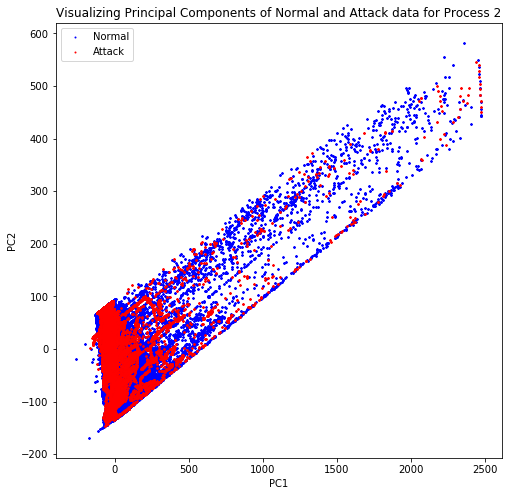

In [23]:
# Now, let's try to see whether by plotting only first two PC, can we differentiate 
# between the data points.
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
#sample_normal = normal_PC.sample(n=100000)
ax.scatter(P2_normal_PC['PC1'],P2_normal_PC['PC2'], s=1,c ='b');
ax.scatter(P2_attack_PC['PC1'],P2_attack_PC['PC2'], s=1,c ='r');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(['Normal','Attack'])
ax.set_title('Visualizing Principal Components of Normal and Attack data for Process 2')
plt.show()

In [315]:
# It is visible from above plot there is a huge need to remove some outliers from normal data to train
# an effective model.
P2_normal_PC = P2_normal_PC[(P2_normal_PC['PC1']>-120)&(P2_normal_PC['PC1']<100)]
P2_normal_PC = P2_normal_PC[(P2_normal_PC['PC2']>-130)&(P2_normal_PC['PC2']<90)]

In [470]:
P2_normal_PC.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,951653.000,951653.000,951653.000,951653.000,951653.000,951653.000,951653.000
mean,-27.288,0.414,-0.970,-0.029,1.326,0.340,-0.095
std,50.167,65.406,44.118,28.842,24.438,21.422,19.617
min,-120.000,-156.798,-81.132,-87.557,-63.056,-93.621,-82.254
25%,-67.893,-65.740,-33.997,-9.809,-16.751,-5.880,-7.738
50%,-30.282,18.615,-8.896,-1.537,-0.762,0.222,0.542
75%,9.763,61.341,23.765,11.178,11.416,5.207,6.051
max,99.986,107.532,98.053,102.210,144.493,91.975,94.782


In [474]:
P2_normal_PC[P2_normal_PC['PC2']<-130]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
6999,-6.490,-132.957,-9.895,16.787,-23.381,-5.599,2.517
7000,-6.490,-132.957,-9.895,16.787,-23.381,-5.599,2.517
7001,-6.490,-132.957,-9.895,16.787,-23.381,-5.599,2.517
7002,-6.490,-132.957,-9.895,16.787,-23.381,-5.599,2.517
7003,-6.490,-132.957,-9.895,16.787,-23.381,-5.599,2.517
7004,-12.637,-133.070,-10.258,16.375,-21.999,-5.388,2.481
7005,-12.637,-133.070,-10.258,16.375,-21.999,-5.388,2.481
7006,-12.637,-133.070,-10.258,16.375,-21.999,-5.388,2.481
7007,-12.637,-133.070,-10.258,16.375,-21.999,-5.388,2.481
7008,-12.637,-133.070,-10.258,16.375,-21.999,-5.388,2.481


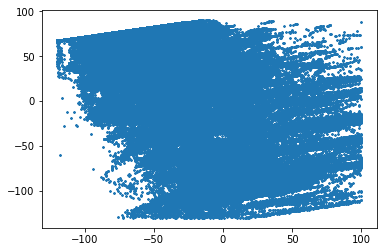

In [476]:
# We had removed some outliers from normal data. Let's see how it looks now.
plt.scatter(P2_normal_PC['PC1'],P2_normal_PC['PC2'],s=1)

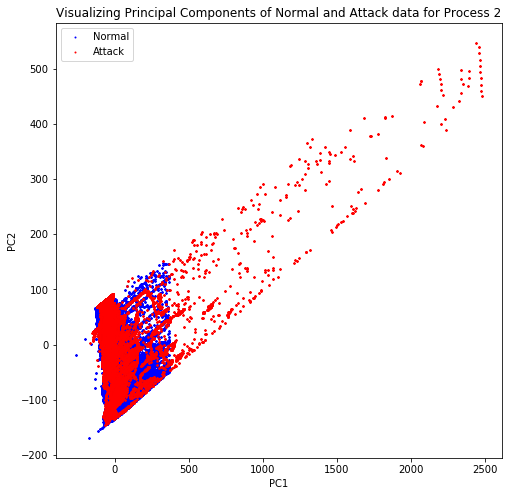

In [178]:
# Now, let's try to see whether by plotting only first two PC, can we differentiate 
# between the data points.
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
#sample_normal = normal_PC.sample(n=100000)
ax.scatter(P2_normal_PC['PC1'],P2_normal_PC['PC2'], s=1,c ='b');
ax.scatter(P2_attack_PC['PC1'],P2_attack_PC['PC2'], s=1,c ='r');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(['Normal','Attack'])
ax.set_title('Visualizing Principal Components of Normal and Attack data for Process 2')
plt.show()

## Before training the model, let's first arrange all the actual attacks in a dataframe.

In [63]:
actual_attacks = attack_data[['Date','Time']]
actual_attacks['DateTime'] = actual_attacks['Date']+' '+actual_attacks['Time']

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
actual_attacks['datetime'] = list(pd.to_datetime(actual_attacks['DateTime']))

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
actual_attacks['state'] = 1

/data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
# Now we'll set the datetime column as index for better accessibility of the dataframe.
actual_attacks = actual_attacks.set_index('datetime')

In [67]:
# Let's take out the datetime index of actual attacks by slicing the data based on attack time durations provided 
# in the attack details file for all the 15 attacks.
timestamps_attack = pd.concat([actual_attacks.loc['2017-10-09 19:25:00':'2017-10-09 19:50:16'],
                           actual_attacks.loc['2017-10-10 10:24:10':'2017-10-10 10:34:00'],
                           actual_attacks.loc['2017-10-10 10:55:00':'2017-10-10 11:24:00'],
                           actual_attacks.loc['2017-10-10 11:30:40':'2017-10-10 11:44:50'],
                           actual_attacks.loc['2017-10-10 13:39:30':'2017-10-10 13:50:40'],
                           actual_attacks.loc['2017-10-10 14:48:17':'2017-10-10 14:59:55'],
                           actual_attacks.loc['2017-10-10 17:40:00':'2017-10-10 17:49:40'],
                           actual_attacks.loc['2017-10-11 10:55:00':'2017-10-11 10:56:27'],
                           actual_attacks.loc['2017-10-11 11:17:54':'2017-10-11 11:31:20'],
                           actual_attacks.loc['2017-10-11 11:36:31':'2017-10-11 11:47:00'],
                           actual_attacks.loc['2017-10-11 11:59:00':'2017-10-11 12:05:00'],
                           actual_attacks.loc['2017-10-11 12:07:30':'2017-10-11 12:10:52'],
                           actual_attacks.loc['2017-10-11 12:16:00':'2017-10-11 12:25:36'],
                           actual_attacks.loc['2017-10-11 15:26:30':'2017-10-11 15:37:00']]).index

In [68]:
# Let's change the state of above timestamps to -1 (which mean attack) in the actual_attacks data
actual_attacks.loc[timestamps_attack,'state'] = -1

In [69]:
actual_attacks['state'].value_counts()

 1    162853
-1      9948
Name: state, dtype: int64

### Now, it's time to model the PC reduced normal data using different algorithms.

## ---> One Class SVM on Principal Component reconstructed Process 2 normal data

In [24]:
from sklearn.svm import OneClassSVM

In [511]:
# defining the model with its parameters. One thing to note here is varying the parameters will have a significant
# impact on the outcome of model predictions on attack data. Thus it needs to be adjusted accordingly.
OC_SVM = OneClassSVM(gamma='scale',nu=0.0001)

In [514]:
OC_SVM.fit(P2_normal_PC.sample(500000))

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.0001, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [457]:
# Let's predict how many data points has been identified as normal in attack data.
print(np.count_nonzero(OC_SVM.predict(P2_attack_PC)==1),'data points has been identified as normal')

158073 data points has been identified as normal


#### Time to compute the Confusion Matrix to check the performance of our model.

In [70]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [516]:
predictions = OC_SVM.predict(P2_attack_PC)

In [459]:
print(confusion_matrix(actual_attacks['state'],predictions,labels=[1,-1]))

[[152852  10001]
 [  5221   4727]]


In [460]:
print('Accuracy Score:', accuracy_score(actual_attacks['state'],predictions))

Accuracy Score: 0.9119102320009722


In [461]:
print(classification_report(actual_attacks['state'],predictions))

              precision    recall  f1-score   support

          -1       0.32      0.48      0.38      9948
           1       0.97      0.94      0.95    162853

   micro avg       0.91      0.91      0.91    172801
   macro avg       0.64      0.71      0.67    172801
weighted avg       0.93      0.91      0.92    172801



### Time to check ROC and precision-recall curve for the model

In [509]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [520]:
roc_auc_score(actual_attacks['state'],predictions)

0.7065078839679017

In [530]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [541]:
f1_score(actual_attacks['state'],predictions)

0.9519203786504032

In [538]:
auc(precision_recall_curve(actual_attacks['state'],OC_SVM.decision_function(P2_attack_PC))[1],precision_recall_curve(actual_attacks['state'],OC_SVM.decision_function(P2_attack_PC))[0])

0.9677410877758246

## ---> Isolation Forest on Principal Component reconstructed Process 2 normal data

In [42]:
from sklearn.ensemble import IsolationForest

In [490]:
# Here again, we'll tune the parameters in accordance to provide the best outputs.
Isolation_Forest = IsolationForest(contamination=0.01, n_estimators=100, behaviour='new')

In [491]:
Isolation_Forest.fit(P2_normal_PC.sample(100000))

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [492]:
# Let's predict how many data points has been identified as normal in attack data.
print(np.count_nonzero(Isolation_Forest.predict(P2_attack_PC)==1),'data points has been identified as normal')

168578 data points has been identified as normal


#### Time to compute the Confusion Matrix to check the performance of our model.

In [70]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [353]:
predictions = Isolation_Forest.predict(P2_attack_PC)

In [177]:
print(confusion_matrix(actual_attacks['state'],predictions,labels=[1,-1]))

[[157752   5101]
 [  7335   2613]]


In [172]:
print('Accuracy Score:', accuracy_score(actual_attacks['state'],predictions))

Accuracy Score: 0.928032823884121


In [173]:
print(classification_report(actual_attacks['state'],predictions))

              precision    recall  f1-score   support

          -1       0.34      0.26      0.30      9948
           1       0.96      0.97      0.96    162853

   micro avg       0.93      0.93      0.93    172801
   macro avg       0.65      0.62      0.63    172801
weighted avg       0.92      0.93      0.92    172801



## ---> Elliptic Envelope on Principal Component reconstructed Process 1 normal data

In [255]:
from sklearn.covariance import EllipticEnvelope

In [502]:
# Here again, we'll tune the parameters in accordance to provide the best outputs.
Elliptic_Envelope = EllipticEnvelope(contamination=0.1)

In [503]:
Elliptic_Envelope.fit(P2_normal_PC.sample(100000))

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [504]:
# Let's predict how many data points has been identified as normal in attack data.
print(np.count_nonzero(Elliptic_Envelope.predict(P2_attack_PC)==1),'data points has been identified as normal')

151996 data points has been identified as normal


#### Time to compute the Confusion Matrix to check the performance of our model.

In [70]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [505]:
predictions = Elliptic_Envelope.predict(P2_attack_PC)

In [312]:
print(confusion_matrix(actual_attacks['state'],predictions,labels=[1,-1]))

[[144189  18664]
 [  8608   1340]]


In [306]:
print('Accuracy Score:', accuracy_score(actual_attacks['state'],predictions))

Accuracy Score: 0.8421768392544025


In [303]:
print(classification_report(actual_attacks['state'],predictions))

              precision    recall  f1-score   support

          -1       0.07      0.13      0.09      9948
           1       0.94      0.89      0.91    162853

   micro avg       0.84      0.84      0.84    172801
   macro avg       0.51      0.51      0.50    172801
weighted avg       0.89      0.84      0.87    172801

